# Iris Classification With Auto ML


### 0. 데이터 개요

![1](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

![2](https://miro.medium.com/v2/resize:fit:638/0*2c7voFri9cIXGrc4)

### 1. 라이브러리 설치 및 준비

In [ ]:
#종속 라이브러리 설치
!pip install requests
!pip install tabulate
!pip install future
# 기존 h2o 삭제
!pip uninstall h2o
# h2o 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=aeac1c6a530273b869d24258bdffbd0496e84d818517e0243c0e84fb945a9eb5
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import h2o
from h2o.automl import H2OAutoML

%matplotlib inline


h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyd742bhu
  JVM stdout: /tmp/tmpyd742bhu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyd742bhu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_fygqii
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### 2. 데이터 불러오기

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target).apply(lambda x: iris.target_names[x])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y='target'
x=list(df.columns)
x.remove(y)

### 3. 데이터 전처리

In [ ]:
#train, validation, test 8:1:1 분할
train, valid = train_test_split(df, test_size=0.2, shuffle=True)
valid, test = train_test_split(valid, test_size=0.5, shuffle=True)

In [ ]:
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)
h2o_test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### 4. 모델 설계

In [ ]:
aml = H2OAutoML(max_runtime_secs = 30, project_name="iris", exclude_algos = ['StackedEnsemble'])

### 5. 모델 학습

In [ ]:
aml.train(x=x, y=y, training_frame=h2o_train, leaderboard_frame=h2o_valid)

AutoML progress: |██████████████████████████████████████
10:14:02.963: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

█████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20231113_101343


Model Summary: 
    number_of_trees
--  -----------------
    1

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.2885461414787367
RMSE: 0.5371649108781554
LogLoss: 0.7717569105382349
Mean Per-Class Error: 0.0474025974025974
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
41        0             0            0          0 / 41
0         34            1            0.0285714  1 / 35
0         5             39           0.113636   5 / 44
41        39            40           0.05       6 / 120

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.95
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.2957597513437276
RMSE: 0.5438379826232511
LogLoss: 0.7862732070857038
Mean Per-Class Error: 0.03614718614718615
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
41        0             0            0          0 / 41
0         32            3            0.0857143  3 / 35
0         1             43           0.0227273  1 / 44
41        33            46           0.0333333  4 / 120

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966667
2    0.991667
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.966667   0.0186339  1             0.958333      0.958333      0.958333      0.958333
auc                      nan        0          nan           nan           nan           nan           nan
err                      0.0333333  0.0186339  0             0.0416667     0.0416667     0.0416667     0.0416667
err_count                0.8        0.447214   0             1             1             1             1
logloss                  0.786273   0.022291   0.776701      0.813695      0.76606       0.806594      0.768315
max_per_class_error      0.115238   0.0914515  0             0.1           0.142857      0.0833333     0.25
mean_per_class_accuracy  0.961587   0.0304838  1             0.966667      0.952381      0.972222      0.916667
mean_per_class_error     0.0384127  0.0304838  0             0.0333333     0.0476191     0.0277778     0.0833333
mse                      0.29576    0.0111563  0.291547      0.309598      0.285531      0.305648      0.286475
pr_auc                   nan        0          nan           nan           nan           nan           nan
r2                       0.557169   0.077516   0.543666      0.442723      0.587805      0.555422      0.65623
rmse                     0.543761   0.0102299  0.539951      0.556416      0.534351      0.552854      0.535234

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------  ---------

### 6. 모델 확인

In [ ]:
leaderboard = aml.leaderboard
performance = aml.leader.model_performance(h2o_valid)

In [ ]:
performance

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.28405037591747617
RMSE: 0.5329637660455692
LogLoss: 0.7615191637120229
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error    Rate
--------  ------------  -----------  -------  ------
4         0             0            0        0 / 4
0         8             0            0        0 / 8
0         0             3            0        0 / 3
4         8             3            0        0 / 15

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

In [ ]:
leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_3_AutoML_1_20231113_101343,0,0.761519,0.532964,0.28405
GBM_3_AutoML_1_20231113_101343,0.0416667,0.169096,0.227041,0.0515474
XGBoost_1_AutoML_1_20231113_101343,0.0416667,0.427095,0.358168,0.128284
GBM_2_AutoML_1_20231113_101343,0.0416667,0.200317,0.237554,0.0564319
DRF_1_AutoML_1_20231113_101343,0.0416667,0.100611,0.187335,0.0350943
XGBoost_2_AutoML_1_20231113_101343,0.0416667,0.880115,0.584545,0.341693
GLM_1_AutoML_1_20231113_101343,0.0416667,0.129008,0.204572,0.0418496
GBM_4_AutoML_1_20231113_101343,0.0416667,0.238009,0.250075,0.0625376


### 7. 변수별 중요도 확인

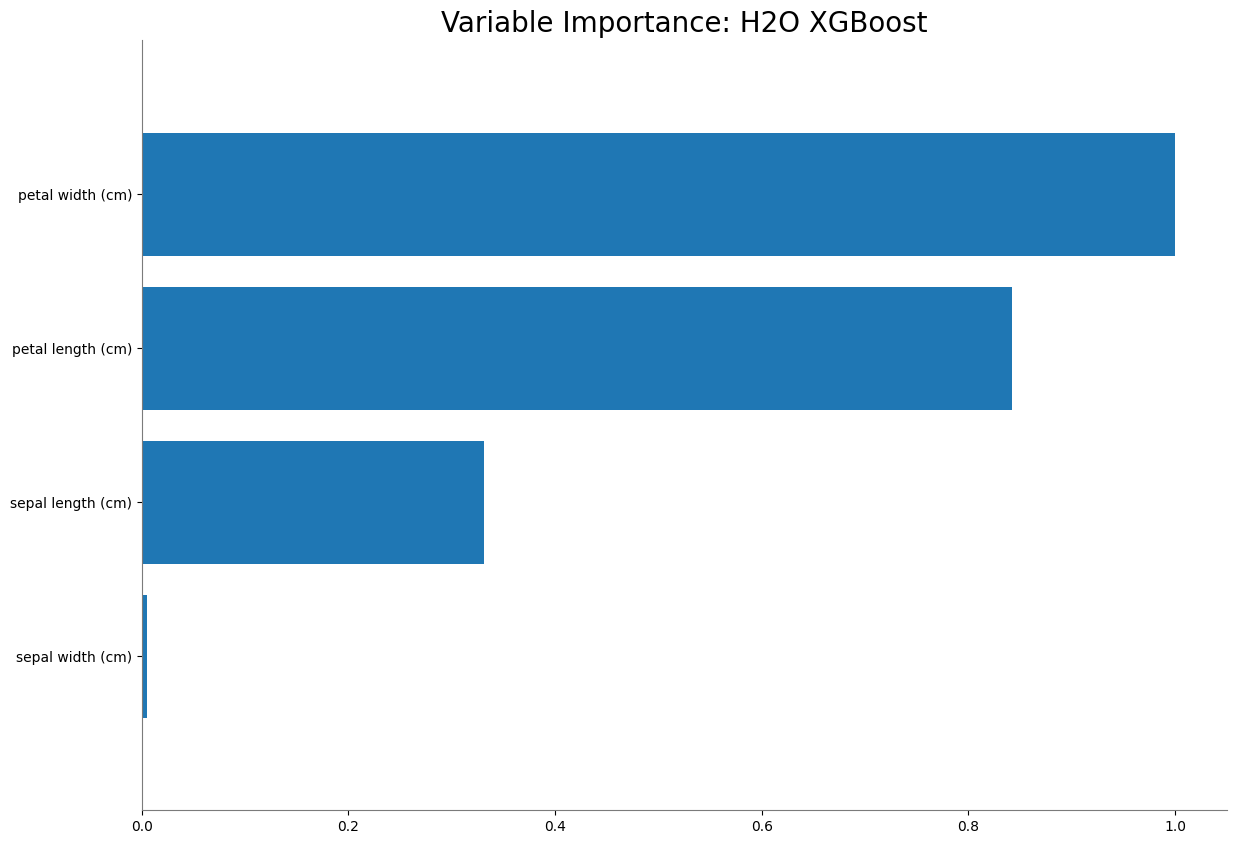

<Figure size 640x480 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()

#모델 특성상 변수별 중요도를 확인할 수 없는 경우가 생길 수 있습니다. 이 경우에는 에러메시지가 뜬 채로 넘어가셔도 됩니다.

### 8. Test Set 평가 (미션)

In [ ]:
get_aml = h2o.automl.get_automl('iris')

In [ ]:
print('2020311587 이수현')
label_predicted = get_aml.predict(h2o_test).as_data_frame()['predict'].tolist()
true_labels = h2o_test['target'].as_data_frame()['target'].tolist()
accuracy = (pd.Series(label_predicted) == pd.Series(true_labels)).mean()
print('Accuracy:', accuracy*100)

2020311587 이수현
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Accuracy: 100.0


### 9. Hint

In [ ]:
label_predicted['predict']

predict
versicolor
virginica
virginica
setosa
setosa
versicolor
versicolor
setosa
versicolor
versicolor


In [ ]:
h2o_test['target']

target
versicolor
virginica
virginica
setosa
setosa
versicolor
versicolor
setosa
versicolor
versicolor


In [ ]:
a = pd.Series([1,2,1])
b = pd.Series([1,2,3])

print(a==b)

0     True
1     True
2    False
dtype: bool


In [ ]:
print(True == 1)
print(False == 0)

True
True


In [ ]:
l = pd.Series([1,0,0,0,1,1,1])
print(l.sum())

4


In [ ]:
print(len(l))

7


#과제 7_2020311587 이수현

In [43]:
label_predicted = get_aml.predict(h2o_test).as_data_frame()['predict'].tolist()
true_labels = h2o_test['target'].as_data_frame()['target'].tolist()
accuracy = (pd.Series(label_predicted) == pd.Series(true_labels)).mean()
print('Accuracy:', accuracy*100)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Accuracy: 100.0
